In [2]:
import pandas as pd
df = pd.read_csv('/content/07_modeloA_final.csv')
print("DataFrame 'df' created successfully.")
print(df.head())

DataFrame 'df' created successfully.
         date             home_team    away_team  home_score  away_score  \
0  1993-04-25              Honduras  El Salvador           2           0   
1  1993-05-07  United Arab Emirates        Japan           1           1   
2  1993-05-09           El Salvador     Honduras           2           1   
3  1993-06-09           South Korea        India           7           0   
4  1993-06-11                 India      Lebanon           1           2   

                     tournament          city               country  neutral  \
0  FIFA World Cup qualification   Tegucigalpa              Honduras        0   
1  FIFA World Cup qualification        Al Ain  United Arab Emirates        0   
2  FIFA World Cup qualification  San Salvador           El Salvador        0   
3  FIFA World Cup qualification         Seoul           South Korea        0   
4  FIFA World Cup qualification         Seoul           South Korea        1   

  shootout_winner  ...  a

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25398 entries, 0 to 25397
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 25398 non-null  object 
 1   home_team            25398 non-null  object 
 2   away_team            25398 non-null  object 
 3   home_score           25398 non-null  int64  
 4   away_score           25398 non-null  int64  
 5   tournament           25398 non-null  object 
 6   city                 25398 non-null  object 
 7   country              25398 non-null  object 
 8   neutral              25398 non-null  int64  
 9   shootout_winner      394 non-null    object 
 10  has_shootout         25398 non-null  bool   
 11  goalscorers_rows     25398 non-null  int64  
 12  penalty_goals_count  25398 non-null  int64  
 13  own_goals_count      25398 non-null  int64  
 14  match_key            25398 non-null  object 
 15  home_team_norm       25398 non-null 

In [6]:
df['date'] = pd.to_datetime(df['date'])
print("DataFrame 'date' column converted to datetime successfully.")
print(df['date'].head())

DataFrame 'date' column converted to datetime successfully.
0   1993-04-25
1   1993-05-07
2   1993-05-09
3   1993-06-09
4   1993-06-11
Name: date, dtype: datetime64[ns]


In [8]:
df['year'] = df['date'].dt.year

matches_per_year = df['year'].value_counts().sort_index()
print("Number of matches per year:\n", matches_per_year.head())

avg_goals_per_year = df.groupby('year')[['home_score', 'away_score']].mean()
print("\nAverage home and away goals per year:\n", avg_goals_per_year.head())

df['total_goals'] = df['home_score'] + df['away_score']
avg_total_goals_per_year = df.groupby('year')['total_goals'].mean()
print("\nAverage total goals per match per year:\n", avg_total_goals_per_year.head())

unique_tournaments_per_year = df.groupby('year')['tournament'].nunique()
print("\nNumber of unique tournaments per year:\n", unique_tournaments_per_year.head())

Number of matches per year:
 year
1993     96
1994    370
1995    504
1996    701
1997    790
Name: count, dtype: int64

Average home and away goals per year:
       home_score  away_score
year                        
1993    1.822917    0.937500
1994    1.424324    1.121622
1995    1.646825    1.029762
1996    1.646220    1.134094
1997    1.743038    1.040506

Average total goals per match per year:
 year
1993    2.760417
1994    2.545946
1995    2.676587
1996    2.780314
1997    2.783544
Name: total_goals, dtype: float64

Number of unique tournaments per year:
 year
1993     8
1994    16
1995    26
1996    23
1997    24
Name: tournament, dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Matplotlib and Seaborn imported successfully.")

Matplotlib and Seaborn imported successfully.


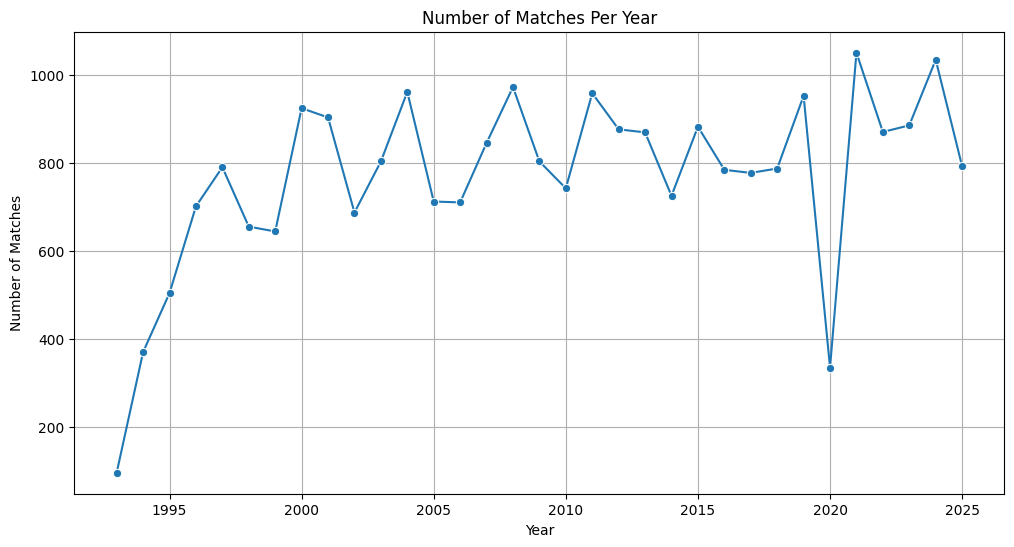

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=matches_per_year.index, y=matches_per_year.values, marker='o')
plt.title('Number of Matches Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

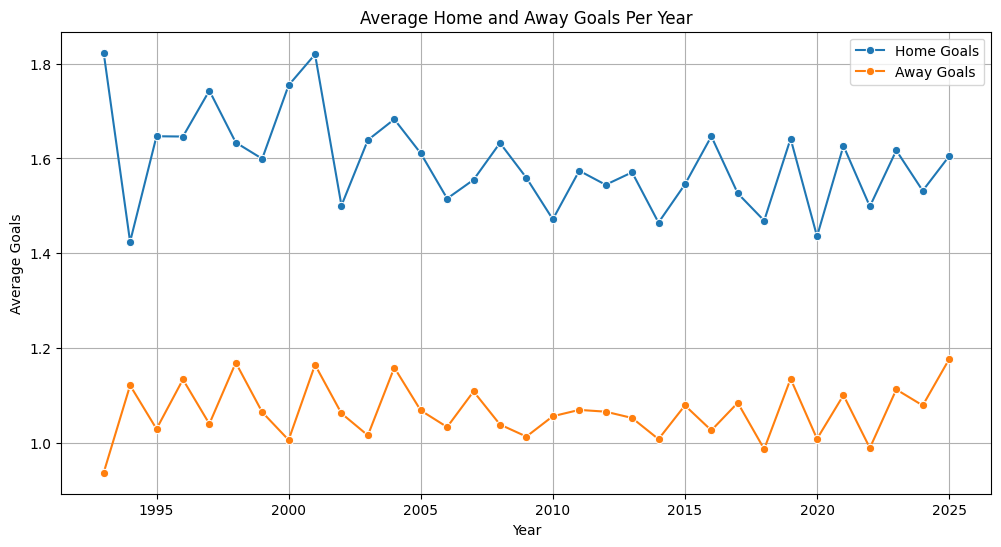

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_goals_per_year.index, y=avg_goals_per_year['home_score'], label='Home Goals', marker='o')
sns.lineplot(x=avg_goals_per_year.index, y=avg_goals_per_year['away_score'], label='Away Goals', marker='o')
plt.title('Average Home and Away Goals Per Year')
plt.xlabel('Year')
plt.ylabel('Average Goals')
plt.legend()
plt.grid(True)
plt.show()

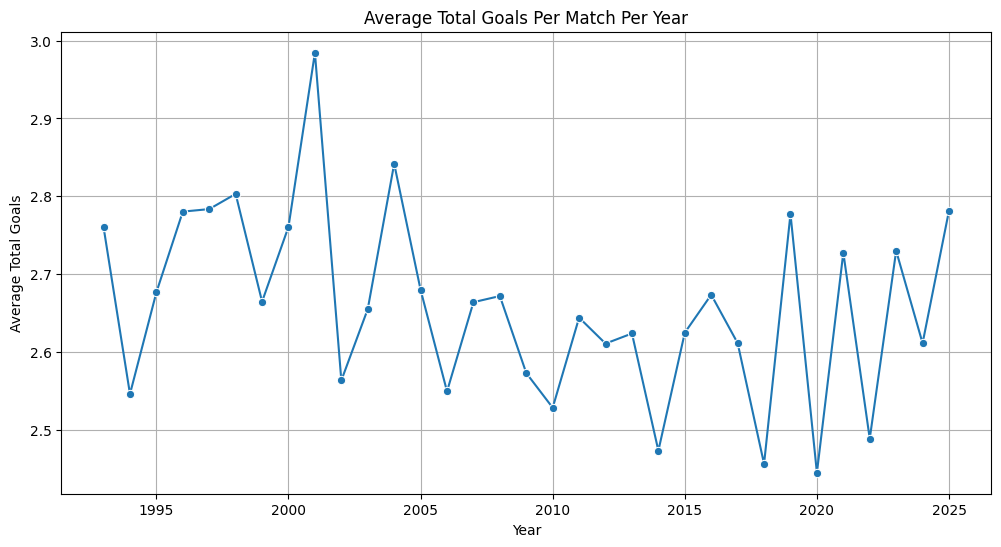

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_total_goals_per_year.index, y=avg_total_goals_per_year.values, marker='o')
plt.title('Average Total Goals Per Match Per Year')
plt.xlabel('Year')
plt.ylabel('Average Total Goals')
plt.grid(True)
plt.show()

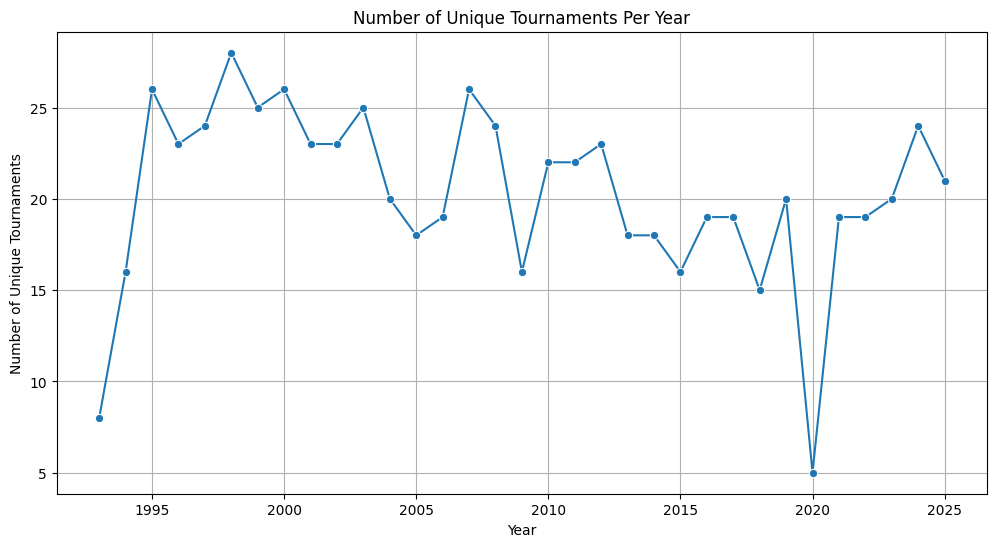

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=unique_tournaments_per_year.index, y=unique_tournaments_per_year.values, marker='o')
plt.title('Number of Unique Tournaments Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Tournaments')
plt.grid(True)
plt.show()